# 평균

`-` 대게 일반적으로 많은 사람들에게 친숙한 단어임

`-` 조금 전문적인 지식(통계, 수학적 지식이 포함된 정의)

*  모든 데이터셋의 값을 더한 후, 그 개수만큼 나눈 것

`-` 평균 구하기 예시 1

In [1]:
x = [10.3, 9.7, 10.3, 9.5, 10.1, 10.8, 9.5, 9.4, 10.1, 10.3]

sum(x)/len(x)

10.0

***

# 중간값

`-` 좀 익숙하지 않은 단어(Median)
* 데이터를 크기에 따라 오름차순으로 정렬 했을 때 정가운데에 있는 값

`-` 근데 만약 데이터의 개수가 짝수이면?

* 중간에 있는 두 개의 값을 더해서 2로 나눈다.

***

# 평균 vs 중간값

`-` 우리는 중간값보다 평균이 더 익숙함

* 근데 데이터 분석에서는 중간값이 더 유용한 경우가 많음

    * 평균값은 이상치 등으로 이상해질 수 있지만, 중앙값은 영향은 덜 받는다.

***

# Q1, Q3 구하기

`-` Q1 : 데이터를 오름차 순으로 정렬 했을 때 `25%`지점에 있는 값

`-` Q3 : 데이터를 오름차 순으로 정렬 했을 때 `75%`지점에 있는 값

`1` 데이터의 개수가 홀수 인 경우

In [20]:
x = [32, 48, 56, 78, 86, 96, 100, 120, 156]
x

[32, 48, 56, 78, 86, 96, 100, 120, 156]

* 데이터의 개수가 총 9개이므로 첫 번째 값부터 중간값까지 5개의 값 중에서 중간에 있는 값이 `Q1`이 된다.

여기에서는 3번째 값인 `56`이 중간값이 됨.

* 이와 마찬가지로 `Q3=100`이란 사실을 알 수 있음

`2` 데이터의 개수가 짝수인 경우

In [23]:
x = [7, 15, 20, 24, 35, 57, 63, 125]
x

[7, 15, 20, 24, 35, 57, 63, 125]

* step1 : 중간값은 `(24+35)/2 = 29.5`

* step2 : 짝수일 경우 Q1을 구하는 방법(위 예시의 경우)

    * (n+1)을 하는 이유는 데이터가 홀수건, 짝수건 일관성 있게 사용하기 위함이다.

$$ (8+1) \times \frac 14 = 2.25$$

* step3 : `2.25`번째 값이므로 2번째 값인 `15`와 `20`사이의 어떤 값(25%에 해당하는 지점)을 구하면 될 것 같다. 그 값은 다음과 같이 구한다.

$$15 \times0.25 + 20 \times 0.75= 18.75$$

* step4 : Q3 구하기, 흠..여섯 번째와 일곱 번째에 어떤 임의의 값이다.

$$(8+1) \times \frac 34 = 6.75$$

* step5 : `6.75`번쨰 값이므로 6번째 값인 `57`과 7번째 값인 `63`사이의 어떤 값(75%지점)을 구하면 될 것 같음

$$57\times 0.75 + 63 \times 0.25 = 58.5$$

# 이상치 정의

`1` IQR = Q3-Q1

`2` $(\text{Q1}- 1.5 \times \text{IQR},\,\text{Q3}+ 1.5 \times \text{IQR})$

* 해당 구간을 벗어난 값을 이상치라고 정의한다.

***

# 상관계수

`-` 변수 간 어떤 연관성이 있는지 $\to$ 주의! 인과관계를 설명하는 것은 아님!

* 상관계수는 단순히 두 변수가 직선관계에 있는지를 가늠하는 정도를 나타내는 것이다.

    * 즉, 상관계수가 0에 가깝다고 해서 두 변수 사이에 아무런 함수관계가 없다는 것을 의미하지는 않는다!
    
    * 아래와 같은 경우 상관계수를 구해보면 `0.0138119`가 나온다.
    
    * 그러면 두 변수 사이에는 어떤 인과관계가 없는거야?

In [75]:
np.corrcoef(x1,y1)

array([[1.        , 0.01388119],
       [0.01388119, 1.        ]])

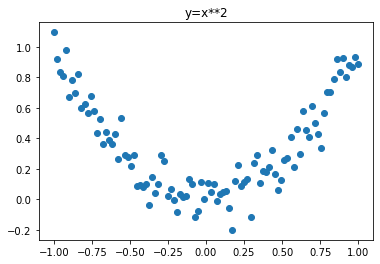

In [76]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(202150256)

x1 = np.linspace(-1,1,100,endpoint=True)
y1 = x1**2 + np.random.normal(scale=0.1,size=100)

plt.plot(x1,y1,"o")
plt.title("y=x**2")
plt.show()

`-` 우리는 저 그래프를 보고 경험적으로 $y = x^2$ 형태를 띄고 있음을 알고 있다.

## 상관계수 시각화 

In [80]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/exam.csv')

df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

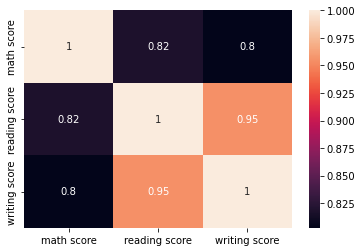

In [81]:
sns.heatmap(df.corr(), annot=True)